<h1>The graph Laplacian</h1>

For any graph, one can define a matrix, the combinatorial Laplacian (Laplacian for short), 
The Laplacian matrix can be written as 
$$L = D - W$$
where $D$ is the $n \times n$ diagonal degree matrix and $W$ is the adjacency matrix.
It can be seen that
$$(L x)_i = \sum_{j=1}^n W_{i,j} (x_i - x_j)$$.

In [9]:
import numpy as np

In [10]:
def create_weight(edgelist,n):
    W = np.zeros((n,n))
    for i,j in edgelist:
        W[i,j] = 1
        W[j,i] = 1
    return W

In [11]:
def create_Lap(W):
    D = np.diag(W.sum(axis=0))
    L = D - W
    return L

In [5]:
n = 100
edgelist = [[i,i+1] for i in range(n-1)] #chain graph
W = create_weight(edgelist,n)
L = create_Lap(W)

In [12]:
x = np.ones(n)

In [13]:
np.dot(L,x)

array([ 0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
        0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
        0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
        0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
        0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
        0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
        0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
        0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.])

<h2>Proposition 1</h2>
Suppose that $\{C_k\}_{k=1}^K$ are maximal connected sets of vertices of $G$ (the addition of any vertex to $C_k$ would be disconnected).  Then the null space of $L$, that is all vectors $x \in \mathbf{R}^n$ such that $Lx = 0$, is the span of the vectors 
$$\mathbf{1}_{C_k}, \quad k=1,\ldots,K$$
where $\mathbf{1}_A$ is 1 for the vertices in $A$ and 0 otherwise.

<i>Special Case (k = 1)</i>

For an unweighted, undirected graph $G$ that has only 1 connected component, the null space of its Lapacian $L$ is the span of the vector $\mathbf{1}$.

<i>Proof</i>

Suppose a graph $G$ has only 1 connected component. 

<b>Proof</b>

Let $L_i$ be the the Lapacian of the graph defined by the vertices from $C_i$, where $i = 1, \ldots, K$. Then, by reording the points, the Lapacian of $G$ can be written as the block diagonal matrix below

$$
L =
\begin{bmatrix}
    L_{1} & 0 & 0 & \dots  & 0 \\
    0 & L_{2} & 0 & \dots  & 0 \\
    0 & 0 & L_{3} & \dots  & 0 \\
    \vdots & \vdots & \vdots & \ddots & \vdots \\
    0 & 0 & 0 & \dots  & L_{K}
\end{bmatrix}
$$



In [14]:
np.linalg.matrix_rank(L)

99

In [15]:
del edgelist[50]

In [17]:
L = create_Lap(create_weight(edgelist,n))

In [19]:
n - np.linalg.matrix_rank(L)

2

In [20]:
edgelist[49]

[49, 50]

In [21]:
edgelist[50]

[51, 52]

In [22]:
basis1 = np.zeros(n)
basis1[0:51] = 1

In [23]:
L.dot(basis1)

array([ 0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
        0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
        0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
        0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
        0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
        0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
        0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
        0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.])

In [24]:
basis2 = np.zeros(n)
basis2[51:] = 1

In [25]:
L.dot(basis2)

array([ 0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
        0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
        0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
        0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
        0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
        0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
        0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
        0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.])

For the connected chain graph, compute the eigenvalues and eigenvectors, and plot (a) the eigenvalues in increasing order (b) plot each eigenvector.

In [28]:
from matplotlib import pyplot as plt

In [29]:
plt.plot(np.arange(n)**2)

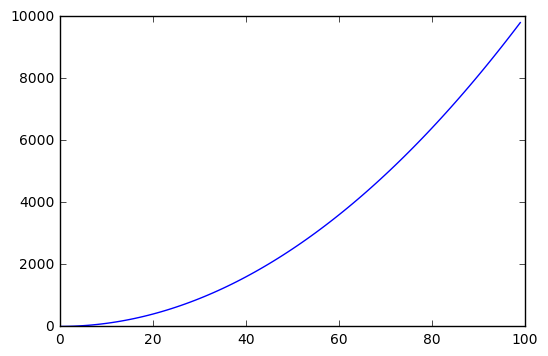

In [30]:
plt.show()